# CASE STUDY ON CHICAGO CRIME DATA

###### This study aims to answer the following questions

* Months with the highest number of crime
* Find the Most Common Crimes by Location Type by Month in 2016
* Determine the Arrests by District by Year
* Find the crimes committed on 001XX N STATE ST but not 0000X W TERMINAL ST. 
* What time of the day do crimes mostly occur
* what day of the week do crimes mostly occur
* Is there a trend on street crimes

In [1]:
import pandas as pd

In [2]:
df_crime = pd.read_csv('chicago_crimes_data.csv')

In [3]:
df_crime.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"


In [4]:
df_crime.shape

(7544367, 22)

df_crime.info()

In [6]:
#we will be working with just few columns: Date,block,primary type,
#description of crime,description of location,arrest,domestic case,city district
selected_columns = ['Date','Year','Block','Primary Type','Description','Location Description','Arrest','Domestic','District']
df_crime_new = df_crime[selected_columns]
df_crime_new.head(3)

,Date,Year,Block,Primary Type,Description,Location Description,Arrest,Domestic,District
0,09/05/2015 01:30:00 PM,2015,043XX S WOOD ST,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,9.0
1,09/04/2015 11:30:00 AM,2015,008XX N CENTRAL AVE,THEFT,POCKET-PICKING,CTA BUS,False,False,15.0
2,09/01/2018 12:01:00 AM,2018,082XX S INGLESIDE AVE,THEFT,OVER $500,RESIDENCE,False,True,6.0


###### Data contains more than seven million rows and 22 columns

In [7]:
#Creating a new column for the months in the data
df_crime_new['new_date'] = pd.to_datetime(df_crime_new['Date']).dt.date

C:\Users\USER\AppData\Local\Temp/ipykernel_13992/4213007629.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_crime_new['new_date'] = pd.to_datetime(df_crime_new['Date']).dt.date


In [8]:
df_crime_new.head() 

,Date,Year,Block,Primary Type,Description,Location Description,Arrest,Domestic,District,new_date
0,09/05/2015 01:30:00 PM,2015,043XX S WOOD ST,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,9.0,2015-09-05
1,09/04/2015 11:30:00 AM,2015,008XX N CENTRAL AVE,THEFT,POCKET-PICKING,CTA BUS,False,False,15.0,2015-09-04
2,09/01/2018 12:01:00 AM,2018,082XX S INGLESIDE AVE,THEFT,OVER $500,RESIDENCE,False,True,6.0,2018-09-01
3,09/05/2015 12:45:00 PM,2015,035XX W BARRY AVE,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,14.0,2015-09-05
4,09/05/2015 01:00:00 PM,2015,0000X N LARAMIE AVE,ASSAULT,SIMPLE,APARTMENT,False,True,15.0,2015-09-05


In [9]:
df_crime_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7544367 entries, 0 to 7544366
Data columns (total 10 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Date                  object 
 1   Year                  int64  
 2   Block                 object 
 3   Primary Type          object 
 4   Description           object 
 5   Location Description  object 
 6   Arrest                bool   
 7   Domestic              bool   
 8   District              float64
 9   new_date              object 
dtypes: bool(2), float64(1), int64(1), object(6)
memory usage: 474.9+ MB


In [10]:
#convert the date column from type object to datetime
df_crime_new['new_date'] = pd.to_datetime(df_crime_new['new_date'])

C:\Users\USER\AppData\Local\Temp/ipykernel_13992/3264222464.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_crime_new['new_date'] = pd.to_datetime(df_crime_new['new_date'])


In [11]:
df_crime_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7544367 entries, 0 to 7544366
Data columns (total 10 columns):
 #   Column                Dtype         
---  ------                -----         
 0   Date                  object        
 1   Year                  int64         
 2   Block                 object        
 3   Primary Type          object        
 4   Description           object        
 5   Location Description  object        
 6   Arrest                bool          
 7   Domestic              bool          
 8   District              float64       
 9   new_date              datetime64[ns]
dtypes: bool(2), datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 474.9+ MB


In [168]:
df_crime_new['Month'] = pd.DatetimeIndex(df_crime_new['new_date']).month
df_crime_new['Day'] = pd.DatetimeIndex(df_crime_new['new_date']).weekday

C:\Users\USER\AppData\Local\Temp/ipykernel_13992/4211491615.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\USER\AppData\Local\Temp/ipykernel_13992/4211491615.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [169]:
df_crime_new.head(2)

,Date,Year,Block,Primary Type,Description,Location Description,Arrest,Domestic,District,new_date,Month,Day
0,09/05/2015 01:30:00 PM,2015,043XX S WOOD ST,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,9.0,2015-09-05,9,5
1,09/04/2015 11:30:00 AM,2015,008XX N CENTRAL AVE,THEFT,POCKET-PICKING,CTA BUS,False,False,15.0,2015-09-04,9,4


In [14]:
crime_month = df_crime_new['Month'].value_counts()
crime_month

7     694657
8     687772
5     670700
6     660637
10    652784
9     645635
3     628990
4     626287
1     600473
11    587906
12    559565
2     528961
Name: Month, dtype: int64

In [15]:
crime_month.sort_index(ascending=True,inplace=True)

In [16]:
#convert series to dataframe

df_crime_month = pd.DataFrame(crime_month)
df_crime_month

,Month
1,600473
2,528961
3,628990
4,626287
5,670700
6,660637
7,694657
8,687772
9,645635
10,652784


In [17]:
df_crime_month.index

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64')

In [18]:
months = {1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July',8:'August', 9:'September',10: 'October',11: 'November',12:'December'}
df_crime_month.index =  df_crime_month.index.map(months)

In [19]:
df_crime_month

,Month
January,600473
February,528961
March,628990
April,626287
May,670700
June,660637
July,694657
August,687772
September,645635
October,652784


In [20]:
#rename column name
df_crime_month.rename(columns={'Month':'crime_count'},inplace=True)
#create percnetage column
df_crime_month['%crime'] = round((df_crime_month['crime_count'] / df_crime_month['crime_count'].sum()) *100,2)
#df_crime_month['percentage_difference'] = df_crime_month['%crime'].pct_change() 
df_crime_month

,crime_count,%crime
January,600473,7.96
February,528961,7.01
March,628990,8.34
April,626287,8.30
May,670700,8.89
June,660637,8.76
July,694657,9.21
August,687772,9.12
September,645635,8.56
October,652784,8.65


In [21]:
#Visualizing the crime rate by month
import matplotlib.pyplot as plt
import seaborn as sns

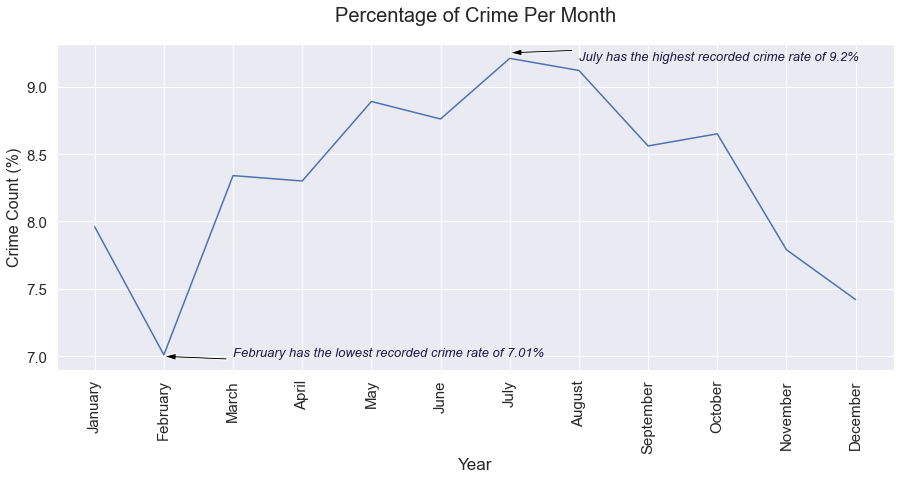

In [51]:
sns.set_style('white')
sns.set_palette(['#6290C3']) #or RdBu
sns.set_context('paper')
#sns.set(rc = {'figure.figsize':(15,6)})

g = sns.lineplot(x=df_crime_month.index,y = '%crime', data=df_crime_month)
g.set_title('Percentage of Crime Per Month',y = 1.05,fontsize=20)
g.set_xlabel('Year',fontsize=17)
g.set_ylabel('Crime Count (%)',fontsize=16)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
g.annotate('July has the highest recorded crime rate of 9.2%'
           ,fontsize=13,
           fontstyle='italic',
           color='#1A1B41',
           xy=(5.95,9.25), #set to where the arrow head is going to 
           xytext=(7,9.2), #insert to where the textstarts
           arrowprops=dict(facecolor='black',shrink=0.05,width=2,headwidth=7))
g.annotate('February has the lowest recorded crime rate of 7.01%'
           ,fontsize=13,fontstyle='italic'
           ,color='#1A1B41',
           xy=(0.95,7), #set to where the arrow head is going to 
           xytext=(2,7), #insert to where the textstarts
           arrowprops=dict(facecolor='black',shrink=0.05,width=2,headwidth=7))

plt.show()

#### insight
* Crime has been high through the months but July had the highest crime rate of about 9.2% which is about 2% higher 
than the percentage crime rate of other months

In [23]:
df_crime_new.head(2)

,Date,Year,Block,Primary Type,Description,Location Description,Arrest,Domestic,District,new_date,Month,Day
0,09/05/2015 01:30:00 PM,2015,043XX S WOOD ST,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,9.0,2015-09-05,9,5
1,09/04/2015 11:30:00 AM,2015,008XX N CENTRAL AVE,THEFT,POCKET-PICKING,CTA BUS,False,False,15.0,2015-09-04,9,4


In [84]:
location_frame = df_crime_new['Location Description'].value_counts(ascending=False)[:10]
location_frame = location_frame.to_frame()
location_frame

,Location Description
STREET,1956042
RESIDENCE,1275534
APARTMENT,835128
SIDEWALK,716958
OTHER,270051
PARKING LOT/GARAGE(NON.RESID.),203005
ALLEY,167617
"SCHOOL, PUBLIC, BUILDING",146393
SMALL RETAIL STORE,140354
RESIDENCE-GARAGE,135546


In [85]:
list(location_frame.index)

['STREET',
 'RESIDENCE',
 'APARTMENT',
 'SIDEWALK',
 'OTHER',
 'PARKING LOT/GARAGE(NON.RESID.)',
 'ALLEY',
 'SCHOOL, PUBLIC, BUILDING',
 'SMALL RETAIL STORE',
 'RESIDENCE-GARAGE']

* Top 10 places were crimes are mostly commited

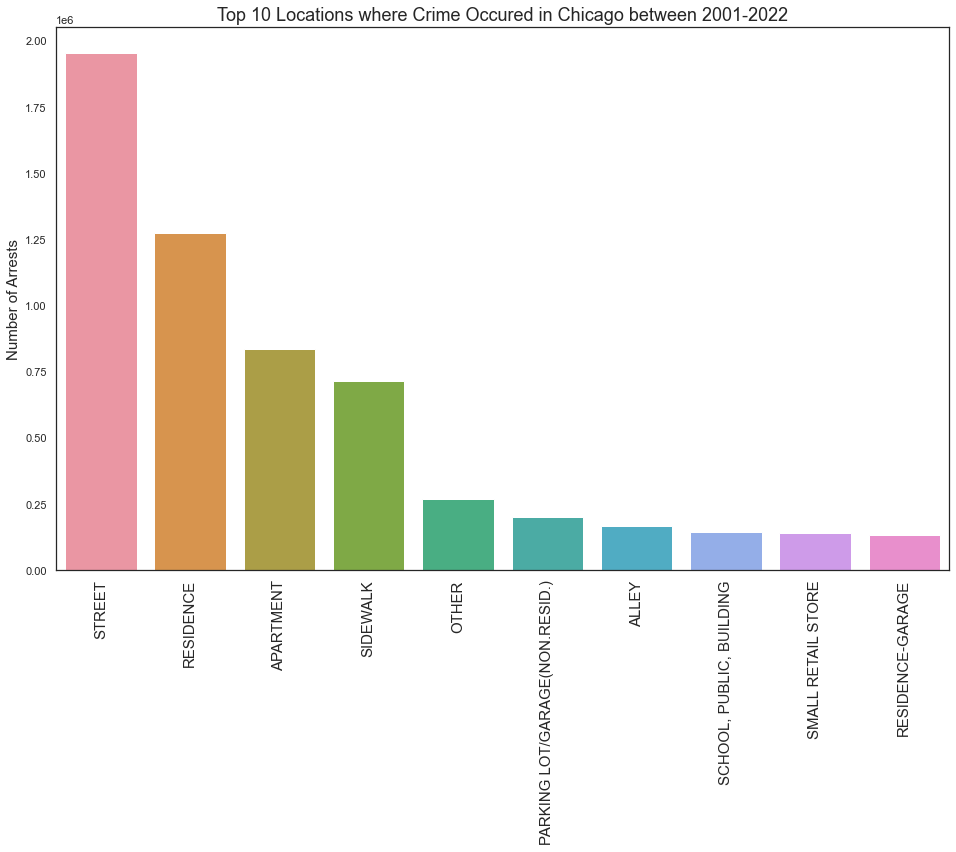

In [157]:
sns.set(rc = {'figure.figsize':(16,10)})
sns.set_style('white')
sns.set_palette(['#A50114']) #or RdBu
sns.barplot(data = location_frame,x=location_frame.index,y=location_frame['Location Description'])
plt.title('Top 10 Locations where Crime Occured in Chicago between 2001-2022',fontsize=18)
plt.ylabel('Number of Arrests',fontsize=15)
#plt.yscale('log')
plt.xticks(rotation=90,fontsize=15)
#plt.yticks(ticks=[0,250,500,750,1,1.25,1.50,1.75,2])
plt.show()

In [26]:
#create dataframe containing only top loactions where crimes were commited
df_top_location = df_crime_new[df_crime_new['Location Description'].isin(list(g.index)) ]
df_top_location.head()

,Date,Year,Block,Primary Type,Description,Location Description,Arrest,Domestic,District,new_date,Month,Day
0,09/05/2015 01:30:00 PM,2015,043XX S WOOD ST,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,9.0,2015-09-05,9,5
2,09/01/2018 12:01:00 AM,2018,082XX S INGLESIDE AVE,THEFT,OVER $500,RESIDENCE,False,True,6.0,2018-09-01,9,1
3,09/05/2015 12:45:00 PM,2015,035XX W BARRY AVE,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,14.0,2015-09-05,9,5
4,09/05/2015 01:00:00 PM,2015,0000X N LARAMIE AVE,ASSAULT,SIMPLE,APARTMENT,False,True,15.0,2015-09-05,9,5
5,09/05/2015 10:55:00 AM,2015,082XX S LOOMIS BLVD,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,6.0,2015-09-05,9,5


In [27]:
df_top_location.shape

(5053713, 12)

In [29]:
df_top_location.groupby(['Year','Location Description'],as_index=False).agg({'Location Description' : 'count'})

,Year,Location Description
0,2001,28427
1,2001,21334
2,2001,94210
3,2001,29279
4,2001,150457
...,...,...
103,2021,52020
104,2022,15891
105,2022,9880
106,2022,3295


In [30]:
list(g.index)

['STREET', 'RESIDENCE', 'APARTMENT', 'SIDEWALK', 'OTHER']

In [31]:
df_top_location.groupby(['Year','Location Description','Arrest'],as_index=False).agg({'Arrest':'count'})

,Year,Location Description,Arrest
0,2001,APARTMENT,23545
1,2001,APARTMENT,4882
2,2001,OTHER,16754
3,2001,OTHER,4580
4,2001,RESIDENCE,79030
...,...,...,...
211,2022,RESIDENCE,632
212,2022,SIDEWALK,2478
213,2022,SIDEWALK,817
214,2022,STREET,15597


### Determine the Arrests by District by Year

In [32]:
Arrest_True = df_top_location[df_top_location['Arrest']== False]
Arrest_False = df_top_location[df_top_location['Arrest'] == True]
print(f'Number of crime that resulted in an arrest is:  {len(Arrest_True)}')
print(f'Number of crime that did not result to an arrest is:  {len(Arrest_False)}')

Number of crime that resulted in an arrest is:  3789735
Number of crime that did not result to an arrest is:  1263978


In [33]:
#proportion of crimes that led to an arrest and proportion of crime that did not lead to an arrest
arrest_proportion= len(Arrest_True)/(len(Arrest_True) + len(Arrest_False))
arrest_proportion 
print(f'{round(arrest_proportion,2)*100}% of crimes led to an arrest')

75.0% of crimes led to an arrest


* Since about 75% of crimes led to an arrest that means approximately 25% of crimes did not lead to an arrest

In [34]:
df_Arrest_True = Arrest_True.groupby(['Year','District'],as_index=False)['Arrest'].count()
df_Arrest_True.head(10)

,Year,District,Arrest
0,2001,1.0,3650
1,2001,2.0,13562
2,2001,3.0,13972
3,2001,4.0,14703
4,2001,5.0,11189
5,2001,6.0,14217
6,2001,7.0,15903
7,2001,8.0,15228
8,2001,9.0,12016
9,2001,10.0,9821


In [35]:
#what districtand year had the most arrest
Top_10_Arrest_by_year_district = df_Arrest_True.nlargest(10,'Arrest')
Top_10_Arrest_by_year_district

,Year,District,Arrest
29,2002,8.0,16131
168,2008,8.0,16022
6,2001,7.0,15903
167,2008,7.0,15857
28,2002,7.0,15839
122,2006,8.0,15629
51,2003,7.0,15546
48,2003,4.0,15476
52,2003,8.0,15449
99,2005,8.0,15446


* The most arrests happened in district 8 in 2002 with a total number of 16,131 Arrests

In [40]:
!pip install plotly

In [41]:
import plotly.express as px

In [109]:
px.line(data_frame=df_Arrest_True,x='Year',y='Arrest',color='District',title='Arrest made by Each District in Chicago for Year (2001 - 2022)')   

In [ ]:
# Arrest by district from year 2001-2022
df_Arrest_district = Arrest_True.groupby(['District'],as_index=False)['Arrest'].count().nlargest(5,'Arrest')
df_Arrest_district

* The most arrest happened in district 8 through the year 2001-2022 with a total arrest of 258,369

In [ ]:
print(len(df_Arrest_district))

## Find the crimes committed on 001XX N STATE ST but not 0000X W TERMINAL ST. 

In [110]:
df_crime_new.head() 

,Date,Year,Block,Primary Type,Description,Location Description,Arrest,Domestic,District,new_date,Month,Day
0,09/05/2015 01:30:00 PM,2015,043XX S WOOD ST,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,9.0,2015-09-05,9,5
1,09/04/2015 11:30:00 AM,2015,008XX N CENTRAL AVE,THEFT,POCKET-PICKING,CTA BUS,False,False,15.0,2015-09-04,9,4
2,09/01/2018 12:01:00 AM,2018,082XX S INGLESIDE AVE,THEFT,OVER $500,RESIDENCE,False,True,6.0,2018-09-01,9,1
3,09/05/2015 12:45:00 PM,2015,035XX W BARRY AVE,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,14.0,2015-09-05,9,5
4,09/05/2015 01:00:00 PM,2015,0000X N LARAMIE AVE,ASSAULT,SIMPLE,APARTMENT,False,True,15.0,2015-09-05,9,5


In [130]:
list_001XX_N_STATE_ST = set(df_crime_new[df_crime_new['Block'] == '001XX N STATE ST']['Primary Type'])
list_001XX_N_STATE_ST

{'ASSAULT',
 'BATTERY',
 'BURGLARY',
 'CRIM SEXUAL ASSAULT',
 'CRIMINAL DAMAGE',
 'CRIMINAL SEXUAL ASSAULT',
 'CRIMINAL TRESPASS',
 'DECEPTIVE PRACTICE',
 'GAMBLING',
 'INTERFERENCE WITH PUBLIC OFFICER',
 'INTIMIDATION',
 'KIDNAPPING',
 'LIQUOR LAW VIOLATION',
 'MOTOR VEHICLE THEFT',
 'NARCOTICS',
 'OFFENSE INVOLVING CHILDREN',
 'OTHER NARCOTIC VIOLATION',
 'OTHER OFFENSE',
 'PUBLIC INDECENCY',
 'PUBLIC PEACE VIOLATION',
 'ROBBERY',
 'SEX OFFENSE',
 'STALKING',
 'THEFT',
 'WEAPONS VIOLATION'}

In [132]:
list_0000X_W_TERMINAL_ST = set(df_crime_new[df_crime_new['Block'] == '0000X W TERMINAL ST']['Primary Type'])
list_0000X_W_TERMINAL_ST

{'ASSAULT',
 'BATTERY',
 'BURGLARY',
 'CONCEALED CARRY LICENSE VIOLATION',
 'CRIM SEXUAL ASSAULT',
 'CRIMINAL DAMAGE',
 'CRIMINAL SEXUAL ASSAULT',
 'CRIMINAL TRESPASS',
 'DECEPTIVE PRACTICE',
 'INTERFERENCE WITH PUBLIC OFFICER',
 'KIDNAPPING',
 'MOTOR VEHICLE THEFT',
 'NARCOTICS',
 'NON-CRIMINAL',
 'OFFENSE INVOLVING CHILDREN',
 'OTHER OFFENSE',
 'PROSTITUTION',
 'PUBLIC PEACE VIOLATION',
 'ROBBERY',
 'SEX OFFENSE',
 'STALKING',
 'THEFT',
 'WEAPONS VIOLATION'}

In [135]:
list_001XX_N_STATE_ST.difference(list_0000X_W_TERMINAL_ST)

{'GAMBLING',
 'INTIMIDATION',
 'LIQUOR LAW VIOLATION',
 'OTHER NARCOTIC VIOLATION',
 'PUBLIC INDECENCY'}

 Crimes common in block '001XX N STATE ST' that has not occured in'0000X W TERMINAL ST' are GAMBLING,INTIMIDATION,
LIQUOR LAW VIOLATION, OTHER NARCOTIC VIOLATION and PUBLIC INDECENCY

In [141]:
#Function to check for unique crimes in a comparison betweeen two blocks
def differences(block1,block2):
    list_block1 = set(df_crime_new[df_crime_new['Block'] == str(block1)]['Primary Type']) #returns all unique values in the column
    list_block2 = set(df_crime_new[df_crime_new['Block'] == str(block2)]['Primary Type'])
    return list_block1.difference(list_block2)

In [142]:
differences('001XX N STATE ST','0000X W TERMINAL ST')

{'GAMBLING',
 'INTIMIDATION',
 'LIQUOR LAW VIOLATION',
 'OTHER NARCOTIC VIOLATION',
 'PUBLIC INDECENCY'}

In [143]:
differences('0000X N LARAMIE AVE','035XX W BARRY AVE')

{'GAMBLING',
 'KIDNAPPING',
 'OFFENSE INVOLVING CHILDREN',
 'PROSTITUTION',
 'SEX OFFENSE',
 'WEAPONS VIOLATION'}

In [161]:
df_crime_new['Month'].value_counts(ascending=False)

7     694657
8     687772
5     670700
6     660637
10    652784
9     645635
3     628990
4     626287
1     600473
11    587906
12    559565
2     528961
Name: Month, dtype: int64

* This shows that most of the crimes were comitted in july and feburary recorded the least crimes